In [77]:
# GROUP 2 WORK
# QUESTION 1:Explore Data Distribution- Produce summary statistics, visualizations, and interpretive 
# text describing the distributions of the Ship Mode, Segment, City, Sales,Quantity, Discount and Profit

#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset that was downloded from Kaggle
data = pd.read_csv ('SuperstoreData.csv',  encoding = 'iso-8859-1') #Data is in the same folder, and renamed to SuperstoreData.csv

In [4]:
# Display the first five rows of the dataset to understand how its structured
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [8]:
# Summary statistics of numeric columns
summary_statistics = data.describe()
print(summary_statistics)


            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [35]:
#View column Datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
#Change Datatype to int and date before we use them for calculations
data['Sales'] = data['Sales'].astype(int)
data['Quantity'] = data['Quantity'].astype(int)
data['Discount'] = data['Discount'].astype(int)
data['Profit'] = data['Profit'].astype(int)
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [11]:
#View column Datatype again to see if they have changed 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

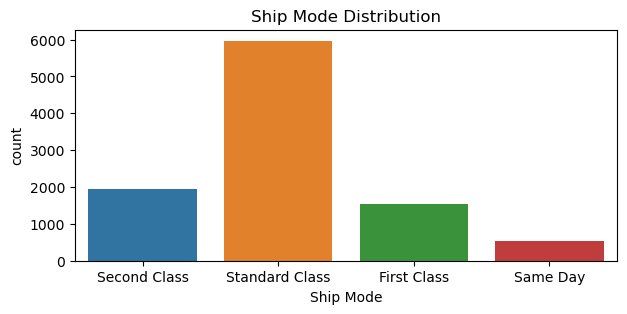

In [60]:
# Start Plotting the distributions of features
# Ship Mode distribution
plt.figure(figsize=(7, 3))
sns.countplot(x='Ship Mode', data=data)
plt.title('Ship Mode Distribution')
plt.show()

In [21]:
#Sales per city
# A table showing sales per city
pivot_data = data.pivot_table(data, index=['City'], aggfunc={
    'Sales': sum, 'Quantity': sum, 'Discount': sum, 'Profit': sum})
pivot_data = pivot_data[['Sales', 'Quantity', 'Discount', 'Profit']]
pivot_data = pivot_data.sort_values(by='Sales',ascending=False)

In [22]:
pivot_data.head()

,Sales,Quantity,Discount,Profit
City,,,,
New York City,255804,3417,0,61610
Los Angeles,175414,2879,0,30099
Seattle,119280,1590,0,28952
San Francisco,112357,1935,0,17278
Philadelphia,108774,1981,0,-13854


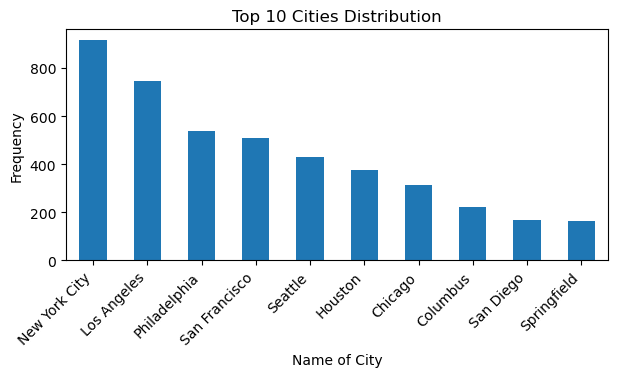

In [61]:
#Top 10 cities by frequency
top_cities = data['City'].value_counts().head(10)

#Bar plot for top 10 cities
plt.figure(figsize=(7, 3))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities Distribution')
plt.xlabel('Name of City')
plt.ylabel('Frequency')
plt.xticks(rotation=45,ha='right')
plt.show()

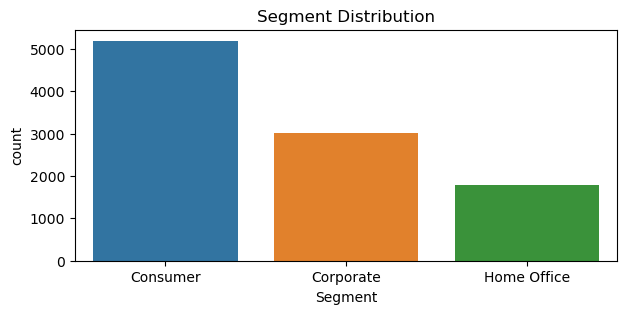

In [62]:
# Count plot for Segment distribution
plt.figure(figsize=(7, 3))
sns.countplot(x='Segment', data=data)
plt.title('Segment Distribution')
plt.show()

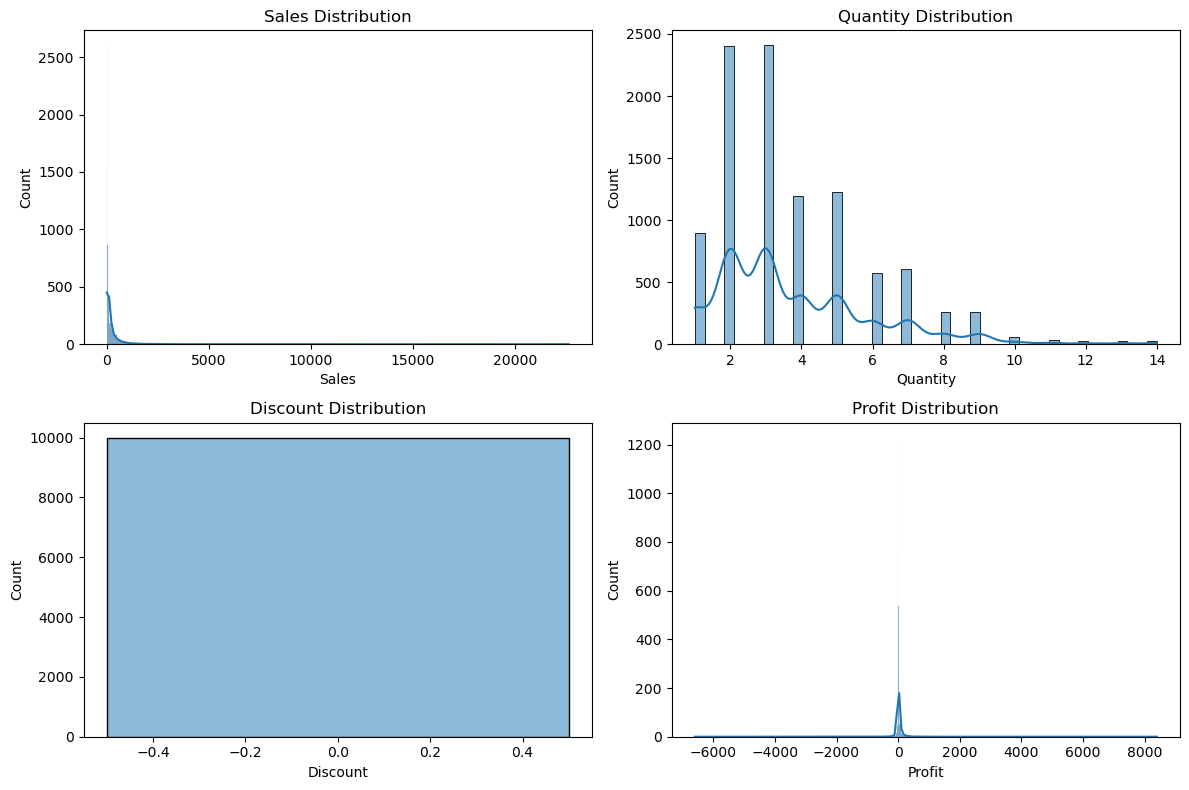

In [61]:
# Distribution plots for Sales, Quantity, Discount, Profit
#Team to explain the Discount hist
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data['Sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['Quantity'], kde=True)
plt.title('Quantity Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['Discount'], kde=True)
plt.title('Discount Distribution')


plt.subplot(2, 2, 4)
sns.histplot(data['Profit'], kde=True)
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()

In [72]:
#Formula from Kibet to filter
#Kibet to explain how this affects sales?
filter_data = data[data['City'].isin(['Henderson']) 
                   & (data['Segment'].isin(['Consumer'])) 
                   & (data['Ship Mode'].isin(['Second Class'])) 
                   & data['Sales'].between(244,800)]

In [73]:
print(filter_data)

   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ... Region  \
0   Claire Gute  Consumer  United States  Henderson  ...  South   
1   Claire Gute  Consumer  United States  Henderson  ...  South   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name Sales Quantity  Discount  \
0                  Bush Somerset Collection Bookcase   261        2         0   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...   731        3         0   

   Profit  Profit_Discount_Difference  
0      41                          41  
1     219                         219  

[2 rows x 22 columns]


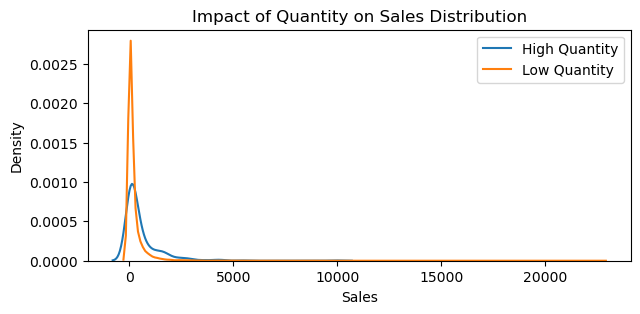

In [39]:
# QUESTION2: Explore Differences between Subsets - Separate the data into subsets based on Quantity and City, 
# then demonstrate how this split impacts the distribution of Sales.

# Subsetting the data based on Quantity
high_quantity = data[data['Quantity'] > 8]  # Subsetting for high Quantity
low_quantity = data[data['Quantity'] <= 8]  # Subsetting for low Quantity

# Subsetting the data based on City (considering top cities for demonstration, e.g., 'New York' and 'Los Angeles')
city_ny = data[data['City'] == 'New York']  # Subsetting for New York
city_la = data[data['City'] == 'Los Angeles']  # Subsetting for Los Angeles

# Create separate plots to compare the impact on Sales distribution

# Quantity-based subset comparison
#skydness
plt.figure(figsize=(7, 3))
sns.kdeplot(high_quantity['Sales'], label='High Quantity')
sns.kdeplot(low_quantity['Sales'], label='Low Quantity')
plt.title('Impact of Quantity on Sales Distribution')
plt.xlabel('Sales')
plt.legend()
plt.show()

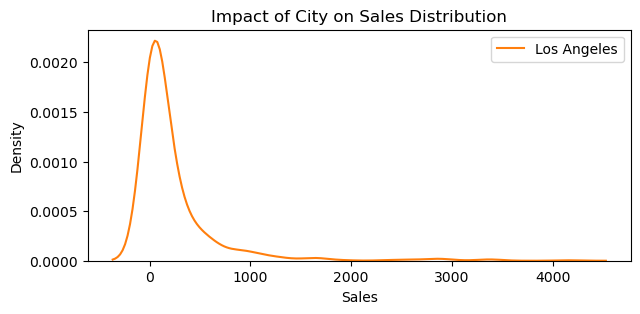

In [43]:

# City-based subset comparison
plt.figure(figsize=(7, 3))
sns.kdeplot(city_ny['Sales'], label='New York')
sns.kdeplot(city_la['Sales'], label='Los Angeles')
plt.title('Impact of City on Sales Distribution')
plt.xlabel('Sales')
plt.legend()
plt.show()

In [25]:

# QUESTION 3: Explore correlations - Find the features that have the strongest positive and negative correlations 
# with Sales, and produce plots representing these relationships.



In [32]:
#Calculate the correlation matrix
numeric_data = data.select_dtypes(include='number') # Select only the numeric columns for the correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.009671 -0.001360 -0.004016       NaN  0.012526
Postal Code  0.009671     1.000000 -0.023843  0.012761       NaN -0.029960
Sales       -0.001360    -0.023843  1.000000  0.200834       NaN  0.479242
Quantity    -0.004016     0.012761  0.200834  1.000000       NaN  0.066275
Discount          NaN          NaN       NaN       NaN       NaN       NaN
Profit       0.012526    -0.029960  0.479242  0.066275       NaN  1.000000


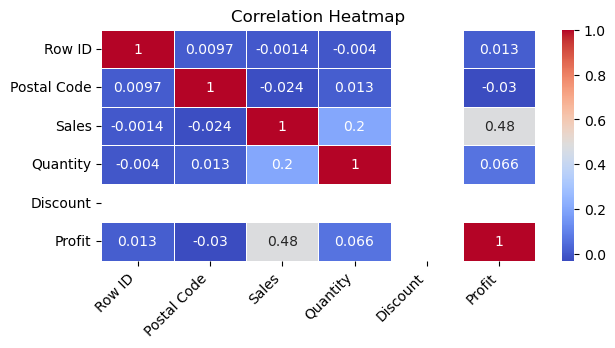

In [63]:
# Find the features with the strongest positive and negative correlations with Sales
strongest_positive_corr = correlation_matrix['Sales'].sort_values(ascending=False).head(5)
strongest_negative_corr = correlation_matrix['Sales'].sort_values(ascending=True).head(5)

# Visualize the relationships using a heatmap
plt.figure(figsize=(7, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45,ha='right')
plt.show()


In [34]:
# Display the features with the strongest positive and negative correlations
print("Strongest Positive Correlations with Sales:")
print(strongest_positive_corr)
print("\nStrongest Negative Correlations with Sales:")
print(strongest_negative_corr)

Strongest Positive Correlations with Sales:
Sales          1.000000
Profit         0.479242
Quantity       0.200834
Row ID        -0.001360
Postal Code   -0.023843
Name: Sales, dtype: float64

Strongest Negative Correlations with Sales:
Postal Code   -0.023843
Row ID        -0.001360
Quantity       0.200834
Profit         0.479242
Sales          1.000000
Name: Sales, dtype: float64


In [65]:
# QUESTION 4: Engineer and Explore a New Feature - Create a new feature, which represents the difference between 
# two significant columns, and plot the relationship between the new feature and sales.

# Creating a new feature representing the difference between 'Profit' and 'Discount'
data['Profit_Discount_Difference'] = data['Profit'] - data['Discount']

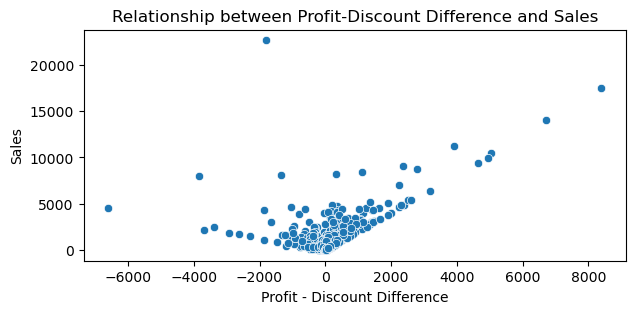

In [66]:
# Plotting the relationship between the new feature and 'Sales'
plt.figure(figsize=(7, 3))
sns.scatterplot(x='Profit_Discount_Difference', y='Sales', data=data)
plt.title('Relationship between Profit-Discount Difference and Sales')
plt.xlabel('Profit - Discount Difference')
plt.ylabel('Sales')
plt.show()

In [45]:
#QUESTION 5: Visualization – Include 3 visualizations of different findings
# Visualization 1:Sales by Ship Mode:
# Group data by Ship Mode and calculate total Sales
ship_mode_sales = data.groupby('Ship Mode')['Sales'].sum().reset_index()

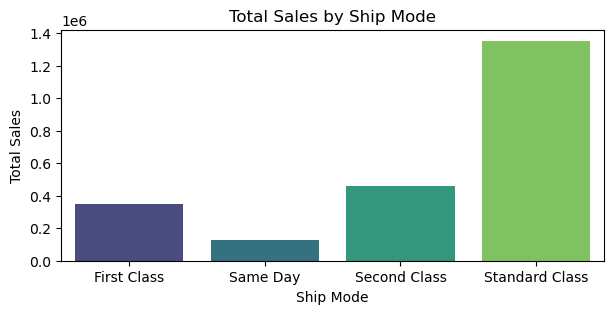

In [46]:
# Create a bar plot
plt.figure(figsize=(7, 3))
sns.barplot(x='Ship Mode', y='Sales', data=ship_mode_sales, palette="viridis")
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.show()

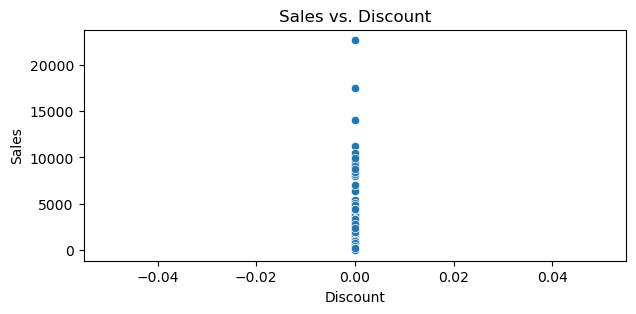

In [76]:
# Visualization 2:Sales vs. Discount
# Create a scatter plot
plt.figure(figsize=(7, 3))
sns.scatterplot(x='Discount', y='Sales', data=data)
plt.title('Sales vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

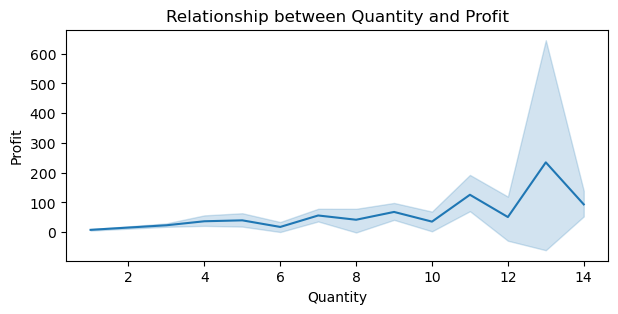

In [53]:
# Visualization 3: Relationship between Quantity and Profit
plt.figure(figsize=(7, 3))
sns.lineplot(x='Quantity', y='Profit', data=data)
plt.title('Relationship between Quantity and Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()
